# 假設檢定(Hypothesis Testing)

## 範例1. 川普的身高190公分，是否比歷屆的美國總統平均身高有顯著的不同?

平均數=179.74, 標準差=7.02, 信賴區間=(165.99, 193.49)


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'plt' is not defined

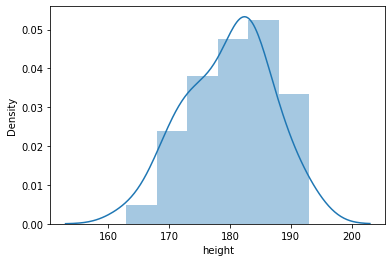

In [4]:
import random 
import pandas as pd
import numpy as np
import seaborn as sns

# 讀取檔案
df = pd.read_csv('./data/president_heights.csv')
df.rename(columns={df.columns[-1]:'height'}, inplace=True)

# 計算信賴區間
m = df['height'].mean()
sd = df['height'].std()
print(f'平均數={m:.2f}, 標準差={sd:.2f}, ' + 
      f'信賴區間=({m-1.96*sd:.2f}, {m+1.96*sd:.2f})')

sns.distplot(df['height'])
plt.axvline(m, color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(m-1.96*sd, color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(m+1.96*sd, color='magenta', linestyle='dashed', linewidth=2)

# 川普的身高190公分
plt.axvline(190, color='red', linewidth=2)

plt.show()

## 範例2. 要調查顧客是否喜歡公司新上市的食品，公司進行問卷調查，取得客戶的評價，範圍介於0~10分，平均分數為5分，使用假設檢定確認。

## t統計量:
### $\begin{equation}t = \frac{\bar{x} - \mu}{s \div \sqrt{n}} \end{equation}$
    

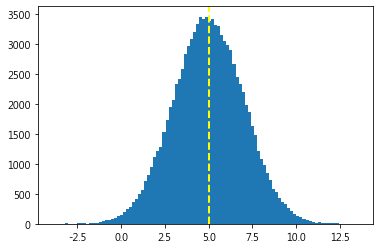

In [87]:
import numpy as np
import matplotlib.pyplot as plt

pop_mean = 5   # 母體平均數
pop_std = 2    # 母體標準差

pop = np.random.normal(pop_mean, pop_std, 100000) # 產生 100000 筆

plt.hist(pop, bins=100)   # 畫直方圖

# 畫平均數
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

最小值:1, 最大值:9, 平均數:5.46


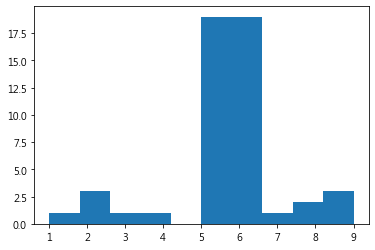

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# 問卷調查，得到客戶的評價
np.random.seed(123)
lo = np.random.randint(0, 5, 6)    # 0~4分  6筆
mid = np.random.randint(5, 7, 38)  # 5~6分 38筆
hi = np.random.randint(7, 11, 6)   # 7~10分 6筆
sample = np.append(lo,np.append(mid, hi))

print(f"最小值:{sample.min()}, 最大值:{sample.max()}, 平均數:{sample.mean()}")

plt.hist(sample)   # 畫直方圖
plt.show()

t統計量:2.0250, p值:0.0242


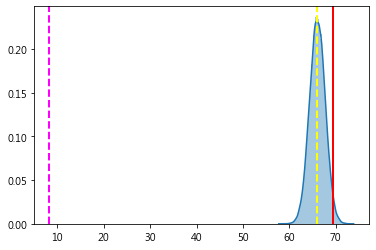

In [105]:
from scipy import stats
import seaborn as sns

# t檢定，scipy 需 v1.6.0 以上才支援 alternative
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
t,p = stats.ttest_1samp(sample, 5, alternative='greater')
print(f"t統計量:{t:.4f}, p值:{p:.4f}")

# 單尾檢定，右尾顯著水準 5%，故取信賴區間 90%，兩邊各 5%
ci = stats.norm.interval(0.90, pop_mean, pop_std)
sns.distplot(pop, bins=100)

# 畫平均數
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)

# 畫右尾顯著水準
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)

# 畫t統計量
plt.axvline(pop.mean() + t*pop.std(), color='red', linewidth=2)

plt.show()

In [107]:
# 載入套件
import scipy.integrate as integrate

# 平均數(mean)、標準差(std)
mean = 0
std = 1
# 常態分配的機率密度函數(Probability Density Function, pdf)
f = lambda x: (1/((2*np.pi*std**2) ** .5)) * np.exp(-0.5*((x-mean)/std)**2) 

# 90%信賴區間之機率
i, e = integrate.quad(f, -1.645, 1.645)

print('累積機率:', round(i, 3))
print('誤差:', str(e))

累積機率: 0.9
誤差: 7.402606925806481e-14


## 雙樣本檢定(Two-Sample Test)
### 範例3. 要檢定新藥有效性，將實驗對象分為兩組，一組為實驗組(Treatment Group)，讓他們服用新藥，另一組為對照組，又稱控制組(Control Group)，讓他們服用安慰劑，檢驗兩組疾病復原狀況是否有明顯差異。

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(123)
Control_Group = np.random.normal(66.0, 1.5, 100)
Treatment_Group = np.random.normal(66.55, 1.5, 200)
print(f"控制組平均數:{Control_Group.mean():.2f}")
print(f"實驗組平均數:{Treatment_Group.mean():.2f}")

控制組平均數:66.04
實驗組平均數:66.46


t統計量:2.2390, p值:0.0129


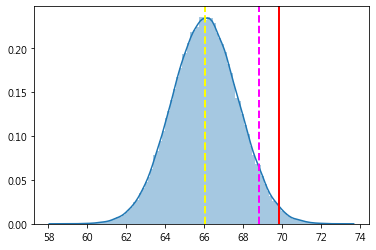

In [109]:
# t檢定，scipy 需 v1.6.0 以上才支援 alternative
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
t,p = stats.ttest_ind(Treatment_Group, Control_Group, alternative='greater')
print(f"t統計量:{t:.4f}, p值:{p:.4f}")

# 單尾檢定，右尾顯著水準 5%，故取信賴區間 90%，兩邊各 5%
pop = np.random.normal(Control_Group.mean(), Control_Group.std(), 100000)
ci = stats.norm.interval(0.90, Control_Group.mean(), Control_Group.std())
sns.distplot(pop, bins=100)

# 畫平均數
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)

# 畫右尾顯著水準
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)

# 畫t統計量
plt.axvline(pop.mean() + t*pop.std(), color='red', linewidth=2)

plt.show()

## 配對檢定(Paired Tests)

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(123)
midTerm = np.random.normal(60, 5, 100)
endTerm = np.random.normal(61, 5, 100)
print(f"期中考:{midTerm.mean():.2f}")
print(f"期末考:{endTerm.mean():.2f}")

期中考:60.14
期末考:60.90


t統計量:1.0159, p值:0.1561


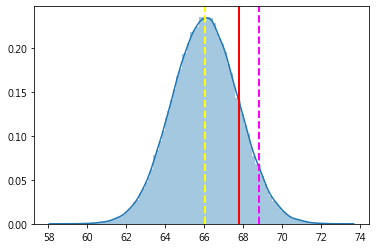

In [118]:
# t檢定，scipy 需 v1.6.0 以上才支援 alternative
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
t,p = stats.ttest_rel(endTerm, midTerm, alternative='greater')
print(f"t統計量:{t:.4f}, p值:{p:.4f}")

# 單尾檢定，右尾顯著水準 5%，故取信賴區間 90%，兩邊各 5%
pop = np.random.normal(Control_Group.mean(), Control_Group.std(), 100000)
ci = stats.norm.interval(0.90, Control_Group.mean(), Control_Group.std())
sns.distplot(pop, bins=100)

# 畫平均數
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)

# 畫右尾顯著水準
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)

# 畫t統計量
plt.axvline(pop.mean() + t*pop.std(), color='red', linewidth=2)

plt.show()